Notebook do uczenia sieci

In [1]:
# Import Bibliotek
import tensorflow as tf
import numpy as np
import pathlib
import os

In [2]:
# Definicja zmiennych
model_name = "my_model4.keras"

batch_size = 32
img_height = 256
img_width = 256

data_dir = pathlib.Path("D:\Dokumenty\Programowanie\IsItAi_SztuczInt_Proj\Real_AI_SD_LD_Dataset\Data_4")

num_classes = 2


checkpoint_path = "training_1/cp.weights.h5"
checkpoint_dir = os.path.dirname(checkpoint_path)


In [3]:
# Ładowanie datasetu do nauki sieci
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  seed=123,
  validation_split=0.2,
  subset="training",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 10248 files belonging to 2 classes.
Using 8199 files for training.


In [4]:
# Ładowanie datasetu do walidacji 
test_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)
# )

Found 10248 files belonging to 2 classes.
Using 2049 files for validation.


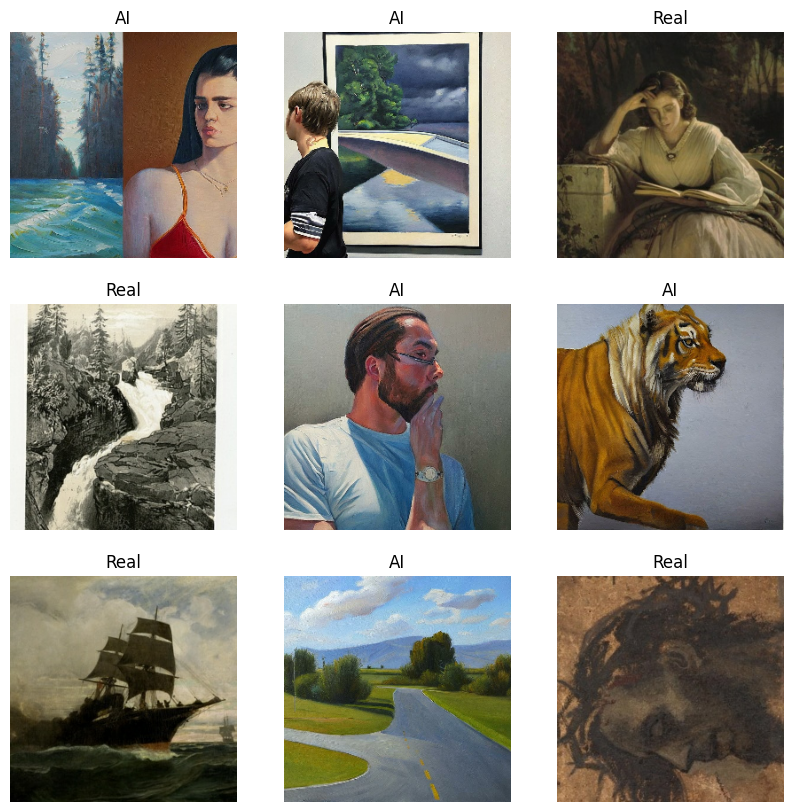

In [5]:
# Wyświetlenie przykładowych danych
import matplotlib.pyplot as plt

class_names = train_ds.class_names

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [6]:
# Normalizacja danych 
normalization_layer = tf.keras.layers.Rescaling(1./255)
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]

# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.043137256 0.9176471


In [7]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = normalized_ds.cache().prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [20]:
# Model
model = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255),
    
    tf.keras.layers.Flatten(),

    # tf.keras.layers.Dense(65536, activation='relu'),

    tf.keras.layers.Conv2D(32768, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(4096, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(1024, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(256, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(128, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),

    # tf.keras.layers.Conv2D(32, 3, activation='relu'),
    # tf.keras.layers.MaxPooling2D(),
    # tf.keras.layers.Conv2D(64, 3, activation='relu'),
    # tf.keras.layers.MaxPooling2D(),
    # tf.keras.layers.Conv2D(128, 3, activation='relu'),
    # tf.keras.layers.MaxPooling2D(),
    # tf.keras.layers.Conv2D(256, 3, activation='relu'),
    # tf.keras.layers.MaxPooling2D(),
    # tf.keras.layers.Flatten(),
    # tf.keras.layers.Dense(256, activation='relu'),

    # tf.keras.layers.Dense(32, activation='relu'),
    # tf.keras.layers.Dense(32, activation='relu'),

    # tf.keras.layers.Dense(50, activation='relu'),

    # tf.keras.layers.Conv2D(32, 3, activation='relu'),
    # tf.keras.layers.MaxPooling2D(),
    # tf.keras.layers.Conv2D(64, 3, activation='relu'),
    # tf.keras.layers.MaxPooling2D(),

    # tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(num_classes, activation='softmax')
])

In [21]:
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path, save_weights_only=True,verbose=1)

In [22]:
model.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

# Załadowanie modelu
# model.load_weights(checkpoint_path)

In [23]:
model.fit(
  train_ds,
  validation_data=test_ds,
  epochs=2,
  verbose=1,
  callbacks=[cp_callback]
)

Epoch 1/2


ValueError: Input 0 of layer "conv2d_15" is incompatible with the layer: expected min_ndim=4, found ndim=2. Full shape received: (None, 196608)

In [12]:
test_loss, test_accuracy = model.evaluate(test_ds)

78/78 ━━━━━━━━━━━━━━━━━━━━ 8s 105ms/step - accuracy: 0.6013 - loss: 0.6921


In [13]:
model.save(model_name)
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_1 (Rescaling)         │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 50176)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    12,845,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           514 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 39,702,728 (151.45 MB)

 Trainable params: 13,234,242 (50.48 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 26,468,486 (100.97 MB)